<a href="https://colab.research.google.com/github/mrhallonline/NLP-Workshop/blob/main/Module_3_Basic_analysis_and_Analysis_Workshop_Natural_Language_Toolkit_(NLTK)_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.0 Basic analysis  (?? minutes)
1. Words
  *   Counting/Sorting
  *   Concordance
  * n-grams/colocations
3. Data Visualization
  *   plot distribution
3. POS Tagging
4. Parsing

# 3.1 We will need to remount Google Drive and create word tokens similar to last module since we are starting on a new Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# load data from existing text file
filename = '/content/drive/MyDrive/raw_uncertaintyText.txt'
uncertaintyText = open(filename, 'rt', encoding='utf-8', errors='replace')

raw_uncertaintyText = uncertaintyText.read()
uncertaintyText.close()

# Word Tokenization
#uncertainty_wordTokens = nltk.word_tokenize(raw_uncertaintyText)

# Regular expression tokenizing Gaps =False
pattern = r'\s+'
uncertainty_wordTokens = nltk.regexp_tokenize(raw_uncertaintyText, pattern, gaps=True)

# Creating a Text object from the tokens
uncertainty_wordTextObjects = nltk.Text(uncertainty_wordTokens)

print("raw_uncertaintyText is a: ",type(raw_uncertaintyText))
print("uncertainty_wordTokens is a: ",type(uncertainty_wordTokens))
print("uncertainty_wordTextObjects is a: ",type(uncertainty_wordTextObjects))

# 3.2 We can look for some simple frequencies and word counts using the word tokens variable:
uncertainty_wordTokens

In [ ]:
# word count
len(uncertainty_wordTokens)

The sorted set lists and alphabetizes all words that appear at least once throughout the document.

In [ ]:
sorted(set(uncertainty_wordTokens[0:25]))

In [ ]:
#Top 25 most common words
fd = nltk.FreqDist(uncertainty_wordTokens)
fd.most_common(25)


In [ ]:
#Top 25 most common words easier to read from page
fd.tabulate(25)

In [ ]:
# Cumulative plot of top 25 words
fd.plot(25, cumulative=True)

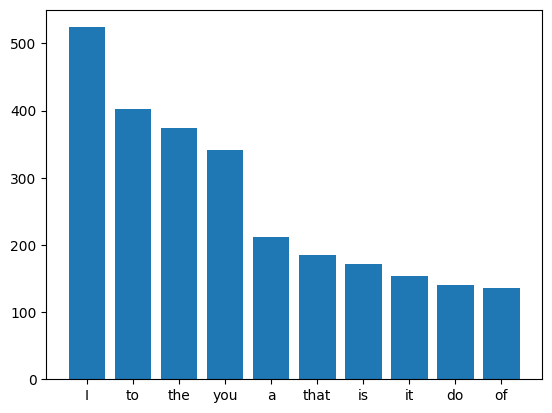

In [ ]:
from matplotlib import pyplot as plt
# Create a frequency distribution
#fd = nltk.FreqDist(tokens_nltk_text)

# Get the 10 most common words and their counts
common = fd.most_common(10)

# Unzip the words and counts into two separate lists
words, counts = zip(*common)

# Create a bar graph
plt.bar(words, counts)
plt.show()

# 3.3 More quick analysis options
1. concordance
2. similar words
3. dispersion plots


In [ ]:
uncertainty_wordTextObjects.concordance('maybe', lines = 15)

In [ ]:
uncertainty_wordTextObjects.similar("maybe")

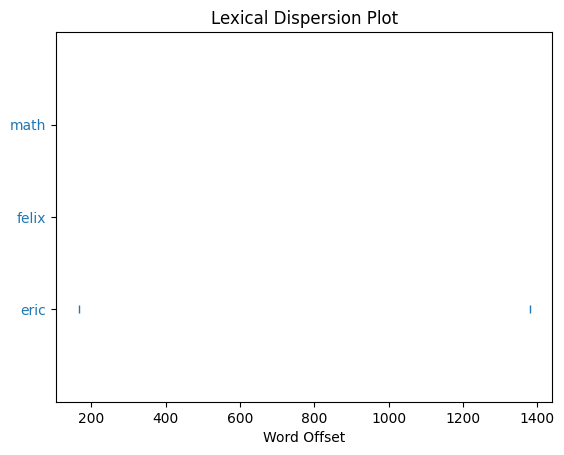

In [ ]:
uncertainty_wordTextObjects.dispersion_plot(["eric","felix", "math"])

# 3.4 n-grams and colocations
1. bigrams
2. trigrams


In [ ]:
Educative_bigrams = list(nltk.bigrams(uncertainty_wordTextObjects))
Educative_bigrams

In [ ]:
Educative_trigrams = list(nltk.trigrams(uncertainty_wordTextObjects))
Educative_trigrams

In [ ]:
finder = nltk.collocations.BigramCollocationFinder.from_words(uncertainty_wordTextObjects)
finder.ngram_fd.tabulate(25)

     ('.', 'I')   ('do', "n't")     ('.', 'It')    ('It', "'s")     ('.', 'So')     ('I', "'m")     ('I', 'do') ('going', 'to')    ('it', "'s")      (',', 'I')    ('.', 'And')      ('?', 'I')    ('.', 'You')   ('.', 'Yeah')     ('.', 'Oh')     ('Oh', ',') ("n't", 'know')     ('it', '.')   ('.', 'What')   ('Yeah', '.')    (',', 'but')   ('like', ',')    ('to', 'do')    (',', 'you')   ('.', 'That') 
            280             113             108             102             101              99              86              81              77              77              76              75              64              64              63              60              55              54              54              53              52              51              49              49              48 


In [ ]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(uncertainty_wordTextObjects)
finder.ngram_fd.tabulate(25)

    ('I', 'do', "n't")      ('.', 'It', "'s")       ('.', 'I', "'m")  ('do', "n't", 'know')       ('.', 'Oh', ',')       ('.', 'I', 'do')    ('.', 'That', "'s")     ('.', 'Yeah', ',')     ('.', 'Yeah', '.')   ('I', "'m", 'going')  ("'m", 'going', 'to')     ('.', 'Okay', '.')       ('?', 'I', 'do')    ('.', 'I', 'think')     ('?', 'Yeah', '.')   ("n't", 'know', '.')     ('.', 'Okay', ',')   ('.', 'And', 'then')      (',', 'it', "'s") ("'re", 'going', 'to')  ('know', 'how', 'to')     ('.', 'I', 'know')  ('going', 'to', 'be')      ('?', 'It', "'s")       ('.', 'No', ',') 
                    81                     79                     45                     45                     45                     37                     37                     33                     31                     25                     25                     23                     23                     22                     22                     21                     20                     20           

In [ ]:
from nltk.util import ngrams

n_value = 4  # Change this for different n values
fourgrams = ngrams(uncertainty_wordTextObjects, n_value)

# Tabulate the top n-grams
fdist = nltk.FreqDist(fourgrams)
fdist.tabulate(25)  # Top 10 fourgrams


      ('I', 'do', "n't", 'know')          ('.', 'I', 'do', "n't")       ('I', "'m", 'going', 'to')          ('?', 'I', 'do', "n't")       ('do', "n't", 'know', '.')          ('to', 'do', 'it', '.')        ('.', 'It', "'s", 'like') ('this', 'plus', 'this', 'plus') ('plus', 'this', 'plus', 'this')       ('I', 'do', "n't", 'want')      ('do', "n't", 'want', 'to')          ('.', 'Yeah', ',', 'I')     ('do', "n't", 'know', 'how')     ("n't", 'know', 'how', 'to')      ('know', 'how', 'to', 'do')         ('.', 'I', 'did', "n't")        ('.', 'How', 'do', 'you')        ('.', 'I', "'m", 'going')    ('do', "n't", 'know', 'what')          ('.', 'Oh', ',', 'you')     ('you', "'re", 'right', '.')           (',', 'no', ',', 'no')          ('.', 'I', 'ca', "n't")          ('.', 'It', "'s", 'so')          (',', 'I', 'do', "n't") 
                              43                               37                               25                               23                               21          

In [ ]:
uncertainty_wordTextObjects.common_contexts(["yeah", "yeah"])

oh_i oh_yeah like_i class_we it_it excellent_they project_okay
amplitude_period work_i right_what calculator_i days_i school_and
that_they okay_you day_that solutions_there added_you here_it here_and


# 4.0 Activity
* Provide participants with a sample transcribed text from the middle school math class.
* They will identify:
** Common themes or topics discussed.
** Questions posed by students indicating uncertainty (using the words we discussed earlier like "maybe", "think" etc.).
** Any specific theories, tools, or names that are frequently mentioned.
* Discuss the findings as a group.

In [ ]:
import nltk
from nltk import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Sample Text Corpus (replace this with your own)
text_corpus = """
Maybe I am wrong about this. I think this could be the solution.
I'm not sure, maybe we should ask the teacher.
Maybe the formula needs to be revised.
I think it's a quadratic equation, maybe we should plot it.
"""

# Download required datasets
nltk.download('punkt')

# Function to get n-grams
def get_ngrams(text, n):
    words = word_tokenize(text.lower())
    generated_ngrams = ngrams(words, n)
    return generated_ngrams

# Function to interactively explore n-grams
def interactive_ngram_explorer():
    uncertainty_word = input("Enter the word of uncertainty you're interested in (e.g., maybe, think, etc.): ").lower()
    n_value = int(input("Enter the n-gram length (e.g., 2 for bigrams, 3 for trigrams, etc.): "))

    n_grams = list(get_ngrams(text_corpus, n_value))
    filtered_ngrams = [gram for gram in n_grams if uncertainty_word in gram]
    ngram_frequencies = Counter(filtered_ngrams)

    print(f"\nHere are the most common {n_value}-grams containing the word '{uncertainty_word}':")
    for gram, freq in ngram_frequencies.items():
        print(f"{gram}: {freq}")

    # Optional: plot the results
    items = ngram_frequencies.items()
    labels = [str(i[0]) for i in items]
    values = [i[1] for i in items]

    plt.figure(figsize=(10,5))
    plt.barh(labels, values)
    plt.xlabel('Frequency')
    plt.title(f"Most common {n_value}-grams containing the word '{uncertainty_word}'")
    plt.show()

# Run the interactive explorer
interactive_ngram_explorer()


# Further Usage

Load Uncertainty Words:Load your list of words that denote uncertainty. This list can be stored as a simple Python list.
Load Text Files: Load the content of your three text files.

Install it using pip install matplotlib. In this code, we use the matplotlib library to create bar plots for each text file, showing the frequency of each uncertainty word. The bar plots are saved as PNG image files with filenames like file_1_word_frequencies.png, file_2_word_frequencies.png, etc. Each plot shows the frequency distribution of uncertainty words in a specific text file.

"maybe","perhaps","unsure","possibly","guess","think","believe","kinda","seem","supposedly","likely","presumably","unclear","doubt"

In [ ]:
uncertainty_words = ["help", "doubt", "difficult", "hard", "equal"]

text_filed = []
text_files_path = ['/content/drive/MyDrive/transcripts/merged/teacher101_merged.txt', '/content/drive/MyDrive/transcripts/merged/teacher102_merged.txt', '/content/drive/MyDrive/transcripts/merged/teacher103_merged.txt']

for file_path in text_files_path:
    with open(file_path, 'r', encoding='utf-8') as file:
        text_filed.append(file.read())
text_filed

Search for Uncertainty Words:
Iterate through the text files and search for the uncertainty words. Count how often each word appears in each file.

In [ ]:
word_frequency_per_file = []

for text in text_filed:
    word_frequency = {}
    for word in uncertainty_words:
        word_frequency[word] = text.lower().count(word.lower())
    word_frequency_per_file.append(word_frequency)
